In [5]:
import pandas as pd 
import numpy as np 


In [6]:
sleep_df=pd.read_csv("data/Sleep_health_and_lifestyle.csv")
mental_df=pd.read_csv("data/Mental_Health_Lifestyle.csv")

Shape & Structure

In [7]:
sleep_df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [8]:
mental_df.head()

,Country,Age,Gender,Exercise Level,Diet Type,Sleep Hours,Stress Level,Mental Health Condition,Work Hours per Week,Screen Time per Day (Hours),Social Interaction Score,Happiness Score
0,Brazil,48,Male,Low,Vegetarian,6.3,Low,NaN,21,4.0,7.8,6.5
1,Australia,31,Male,Moderate,Vegan,4.9,Low,PTSD,48,5.2,8.2,6.8
2,Japan,37,Female,Low,Vegetarian,7.2,High,NaN,43,4.7,9.6,9.7
3,Brazil,35,Male,Low,Vegan,7.2,Low,Depression,43,2.2,8.2,6.6
4,Germany,46,Male,Low,Balanced,7.3,Low,Anxiety,35,3.6,4.7,4.4


In [9]:
sleep_df.shape

(374, 13)

In [10]:
mental_df.shape

(3000, 12)

In [11]:
sleep_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [12]:
mental_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Country                      3000 non-null   object 
 1   Age                          3000 non-null   int64  
 2   Gender                       3000 non-null   object 
 3   Exercise Level               3000 non-null   object 
 4   Diet Type                    3000 non-null   object 
 5   Sleep Hours                  3000 non-null   float64
 6   Stress Level                 3000 non-null   object 
 7   Mental Health Condition      2405 non-null   object 
 8   Work Hours per Week          3000 non-null   int64  
 9   Screen Time per Day (Hours)  3000 non-null   float64
 10  Social Interaction Score     3000 non-null   float64
 11  Happiness Score              3000 non-null   float64
dtypes: float64(4), int64(2), object(6)
memory usage: 281.4+ KB


RENAME COLUMNS

In [13]:
sleep_df.columns =sleep_df.columns.str.lower().str.replace(" ","_")
mental_df.columns =mental_df.columns.str.lower().str.replace(" ","_")   

MISSING VALUE CHECK

In [14]:
sleep_df.isnull().sum()

person_id                    0
gender                       0
age                          0
occupation                   0
sleep_duration               0
quality_of_sleep             0
physical_activity_level      0
stress_level                 0
bmi_category                 0
blood_pressure               0
heart_rate                   0
daily_steps                  0
sleep_disorder             219
dtype: int64

In [15]:
mental_df.isnull().sum()

country                          0
age                              0
gender                           0
exercise_level                   0
diet_type                        0
sleep_hours                      0
stress_level                     0
mental_health_condition        595
work_hours_per_week              0
screen_time_per_day_(hours)      0
social_interaction_score         0
happiness_score                  0
dtype: int64

🔴 STEP 1.1 — PRESSURE SIGNAL NORMALIZATION

Normalize stress

minn-max normalization
normalized_value = (value − min) / (max − min)


In [16]:
sleep_df['stress_norm']=(
    sleep_df['stress_level']-sleep_df['stress_level'].min()
)/(
    sleep_df['stress_level'].max()-sleep_df['stress_level'].min()
)


Normalize heart rate

In [17]:
sleep_df['heart_rate_norm']=(
    sleep_df['heart_rate']-sleep_df['heart_rate'].min()
)/(
sleep_df['heart_rate'].max()-sleep_df['heart_rate'].min()


)

------->>>>>  Combine into Pressure Score

In [18]:
sleep_df['pressure_score']=(sleep_df['stress_norm']*0.7 +sleep_df['heart_rate_norm']*0.3)

🔴 STEP 1.2 — RECOVERY SIGNAL NORMALIZATION

normalize sleep duration

In [19]:
sleep_df['sleep_norm']=(
    sleep_df['sleep_duration']-sleep_df['sleep_duration'].min()
)/(
    sleep_df['sleep_duration'].max()-sleep_df['sleep_duration'].min()

)


normalize qualtity of sleep

In [20]:
sleep_df['sleep_quality_norm']=(
    sleep_df['quality_of_sleep']-sleep_df['quality_of_sleep'].min()
)/(
    sleep_df['quality_of_sleep'].max()-sleep_df['quality_of_sleep'].min()

)


normalize physical activity level


In [21]:
sleep_df['activity_norm'] = (
    sleep_df['physical_activity_level'] - sleep_df['physical_activity_level'].min()
) / (
    sleep_df['physical_activity_level'].max() - sleep_df['physical_activity_level'].min()
)


-------->>>>>Combine into Recovery Score

In [22]:
sleep_df['recovery_score'] = (
    sleep_df['sleep_norm'] * 0.4 +
    sleep_df['sleep_quality_norm'] * 0.3 +
    sleep_df['activity_norm'] * 0.3
)

🔴STEP 1.3 — VOLATILITY SIGNAL

stress ariability usindg standard deviation

In [23]:

stress_std=sleep_df['stress_level'].std()

sleep_df['stress_volatility']=abs(sleep_df['stress_level']-sleep_df['stress_level'].mean()
)/stress_std

Normalize volatility:

In [24]:
sleep_df['volatility_norm'] = (
    sleep_df['stress_volatility'] - sleep_df['stress_volatility'].min()
) / (
    sleep_df['stress_volatility'].max() - sleep_df['stress_volatility'].min()
)

In [25]:
sleep_df[['pressure_score','recovery_score','volatility_norm']].describe()


,pressure_score,recovery_score,volatility_norm
count,374.000000,374.000000,374.000000
mean,0.407701,0.541972,0.527783
std,0.291340,0.230118,0.375916
min,0.000000,0.010000,0.000000
25%,0.140000,0.358704,0.103118
50%,0.351429,0.597407,0.551559
75%,0.660000,0.700000,0.896882
max,0.985714,0.955556,1.000000


In [26]:
sleep_df['performance_risk_raw'] = (
    sleep_df['pressure_score'] * 0.5
    - sleep_df['recovery_score'] * 0.3
    + sleep_df['volatility_norm'] * 0.2
)


In [27]:
sleep_df['performance_risk_score'] = (
    sleep_df['performance_risk_raw'] - sleep_df['performance_risk_raw'].min()
) / (
    sleep_df['performance_risk_raw'].max() - sleep_df['performance_risk_raw'].min()
)


In [28]:
sleep_df[['pressure_score',
           'recovery_score',
           'volatility_norm',
           'performance_risk_score']].describe()


,pressure_score,recovery_score,volatility_norm,performance_risk_score
count,374.000000,374.000000,374.000000,374.000000
mean,0.407701,0.541972,0.527783,0.319347
std,0.291340,0.230118,0.375916,0.285630
min,0.000000,0.010000,0.000000,0.000000
25%,0.140000,0.358704,0.103118,0.101936
50%,0.351429,0.597407,0.551559,0.194699
75%,0.660000,0.700000,0.896882,0.581166
max,0.985714,0.955556,1.000000,1.000000


Create Risk Categories

In [29]:
sleep_df['risk_category'] = pd.qcut(
    sleep_df['performance_risk_score'],
    q=3,
    labels=['Low', 'Medium', 'High']
)


In [30]:
sleep_df['risk_category'].value_counts()


risk_category
Low       133
High      125
Medium    116
Name: count, dtype: int64

In [31]:
sleep_df.groupby('risk_category')[[
    'pressure_score',
    'recovery_score',
    'volatility_norm',
    'performance_risk_score'
]].mean()


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_18044\889534625.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sleep_df.groupby('risk_category')[[


,pressure_score,recovery_score,volatility_norm,performance_risk_score
risk_category,,,,
Low,0.163695,0.759174,0.492274,0.075204
Medium,0.308448,0.565139,0.291594,0.188879
High,0.759429,0.289369,0.784748,0.700190


PLOT 1 — Risk Score Distribution by Category---------------
This plot shows that the risk categories are clearly separated, validating the effectiveness of the risk scoring system.

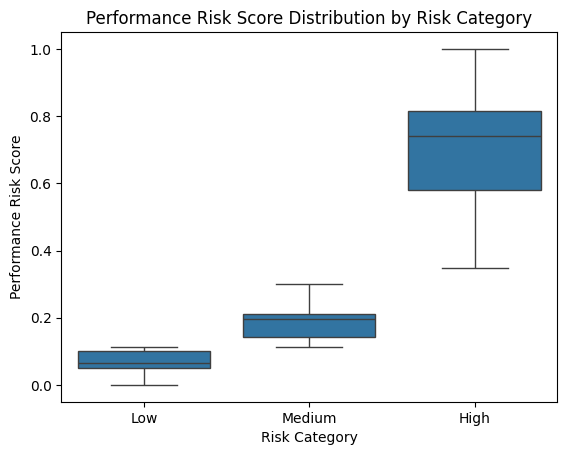

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(
    x='risk_category',
    y='performance_risk_score',
    data=sleep_df,
    order=['Low', 'Medium', 'High']
)

plt.title("Performance Risk Score Distribution by Risk Category")
plt.xlabel("Risk Category")
plt.ylabel("Performance Risk Score")
plt.show()


PLOT 2 — Pressure vs Recovery (Colored by Risk)

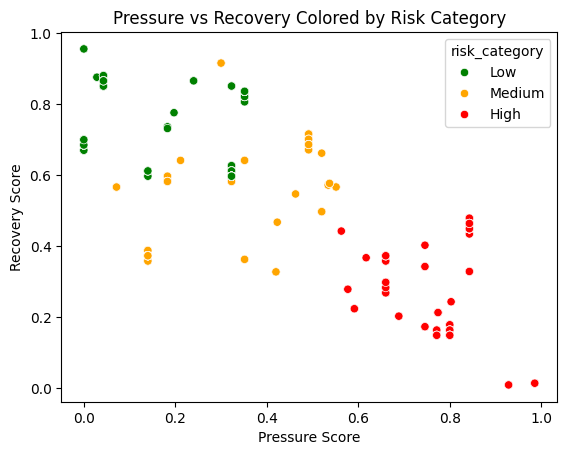

In [33]:
sns.scatterplot(
    x='pressure_score',
    y='recovery_score',
    hue='risk_category',
    data=sleep_df,
    palette={'Low':'green','Medium':'orange','High':'red'}
)

plt.title("Pressure vs Recovery Colored by Risk Category")
plt.xlabel("Pressure Score")
plt.ylabel("Recovery Score")
plt.show()


PLOT 3 — Volatility vs Risk Score

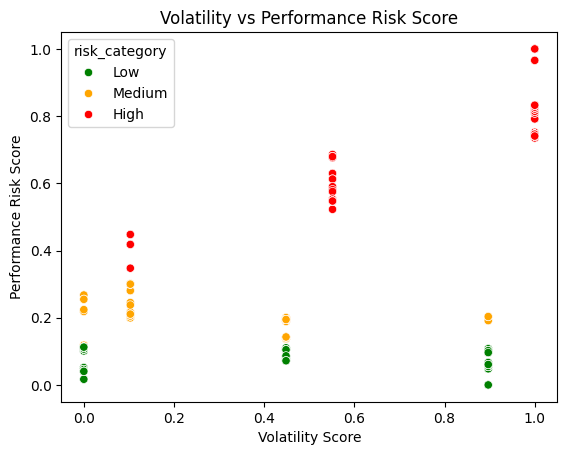

In [34]:
sns.scatterplot(
    x='volatility_norm',
    y='performance_risk_score',
    hue='risk_category',
    data=sleep_df,
    palette={'Low':'green','Medium':'orange','High':'red'}
)

plt.title("Volatility vs Performance Risk Score")
plt.xlabel("Volatility Score")
plt.ylabel("Performance Risk Score")
plt.show()
